INSTALL PACKAGE

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

IMPORT LIBRARY YANG DIBUTUHKAN

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2

MENGHUBUNGKAN DENGAN GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


MEMBACA DATA YANG ADA DI FOLDER

In [ ]:
import os

# Path ke folder gambar
folder_path = '/content/drive/My Drive/Dataset_01/Citra_BISINDO'

# List semua file dalam folder
file_names = os.listdir(folder_path)
print(file_names)

['S', 'W', 'Y', 'V', 'U', 'Q', 'R', 'X', 'Z', 'T', 'I', 'O', 'H', 'M', 'P', 'N', 'L', 'K', 'J', 'G', 'A', 'F', 'D', 'B', 'E', 'C']


MENGHITUNG DATA YANG ADA DI FOLDER

In [ ]:
import os

# Path ke folder Citra_BISINDO
base_path = '/content/drive/My Drive/Dataset_01/Citra_BISINDO'

# Fungsi untuk menghitung jumlah file di setiap subfolder
def count_files_in_base_folder(folder_path):
    total_files = 0
    for subfolder_name in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder_name)
        if os.path.isdir(subfolder_path):
            num_files = len(os.listdir(subfolder_path))
            print(f"Folder {subfolder_name} memiliki {num_files} file")
            total_files += num_files
    return total_files

# Hitung jumlah file
print("Menghitung file di folder Citra_BISINDO:")
total_files = count_files_in_base_folder(base_path)
print(f"Total file di folder Citra_BISINDO: {total_files}")


Menghitung file di folder Citra_BISINDO:
Folder S memiliki 32 file
Folder W memiliki 32 file
Folder Y memiliki 32 file
Folder V memiliki 32 file
Folder U memiliki 32 file
Folder Q memiliki 32 file
Folder R memiliki 32 file
Folder X memiliki 32 file
Folder Z memiliki 32 file
Folder T memiliki 32 file
Folder I memiliki 32 file
Folder O memiliki 32 file
Folder H memiliki 32 file
Folder M memiliki 32 file
Folder P memiliki 32 file
Folder N memiliki 32 file
Folder L memiliki 32 file
Folder K memiliki 32 file
Folder J memiliki 32 file
Folder G memiliki 32 file
Folder A memiliki 32 file
Folder F memiliki 32 file
Folder D memiliki 32 file
Folder B memiliki 32 file
Folder E memiliki 32 file
Folder C memiliki 32 file
Total file di folder Citra_BISINDO: 832


In [ ]:
import shutil



# Menyalin folder dari Google Drive ke Colab
shutil.copytree('/content/drive/My Drive/Dataset_01/images', '/content/dataset/images')

'/content/dataset/images'

MENGUBAH UKURAN GAMBAR DAN MENYIAPKAN UNTUK DI PROSESSING DAN TRAINING

In [ ]:
import cv2

def resize_images_in_folder(folder_path, target_size=(224, 224)):
    # List semua subfolder di dalam folder (misalnya kategori seperti A, B, ...)
    categories = os.listdir(folder_path)

    for category in categories:
        category_path = os.path.join(folder_path, category)

        # Pastikan folder kategori tersebut adalah folder, bukan file
        if os.path.isdir(category_path):
            # List semua file gambar di dalam folder kategori
            image_files = [f for f in os.listdir(category_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

            for img_file in image_files:
                img_path = os.path.join(category_path, img_file)
                # Membaca gambar
                img = cv2.imread(img_path)
                if img is None:
                    print(f'Warning: Gagal membaca {img_path}')
                    continue
                # Resize gambar
                img_resized = cv2.resize(img, target_size)
                # Simpan gambar yang sudah diresize
                cv2.imwrite(img_path, img_resized)

# Tentukan path untuk folder train dan val
train_folder = '/content/dataset/images/train'
val_folder = '/content/dataset/images/val'

# Resize gambar di dalam folder train dan val
resize_images_in_folder(train_folder)
resize_images_in_folder(val_folder)


MELAKUKAN AUGMENTASI DATA YANG ADA

In [ ]:
# Image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),  # Sesuaikan kecerahan
    fill_mode='nearest'

)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 572 images belonging to 26 classes.
Found 260 images belonging to 26 classes.


MENDEFINISIKAN SEBUAH MODEL

In [ ]:
# Define model using MobileNetV2
base_model = MobileNetV2(weights=None, include_top=False, input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])



COMPILE MODEL DENGAN 100 EPOCH

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Menggunakan learning rate lebih kecil
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


checkpoint = ModelCheckpoint(
    filepath='model_checkpoint.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)



# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=[checkpoint]
)



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.0417 - loss: 3.9885
Epoch 1: val_loss improved from inf to 3.25810, saving model to model_checkpoint.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 202s 9s/step - accuracy: 0.0420 - loss: 3.9733 - val_accuracy: 0.0385 - val_loss: 3.2581
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.0238 - loss: 3.2525
Epoch 2: val_loss improved from 3.25810 to 3.25810, saving model to model_checkpoint.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 187s 8s/step - accuracy: 0.0240 - loss: 3.2527 - val_accuracy: 0.0385 - val_loss: 3.2581
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.0437 - loss: 3.2571
Epoch 3: val_loss did not improve from 3.25810
18/18 ━━━━━━━━━━━━━━━━━━━━ 196s 8s/step - accuracy: 0.0430 - loss: 3.2573 - val_accuracy: 0.0385 - val_loss: 3.2581
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.0395 - loss: 3.2564
Epoch 4: val_loss improved from 3.25810 to 3.25810, saving model to model_checkpoint.keras
18/18 ━━━━━━

MEMBUAT GRAFIK HUBUNGAN TRAI DAN VAL

In [ ]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

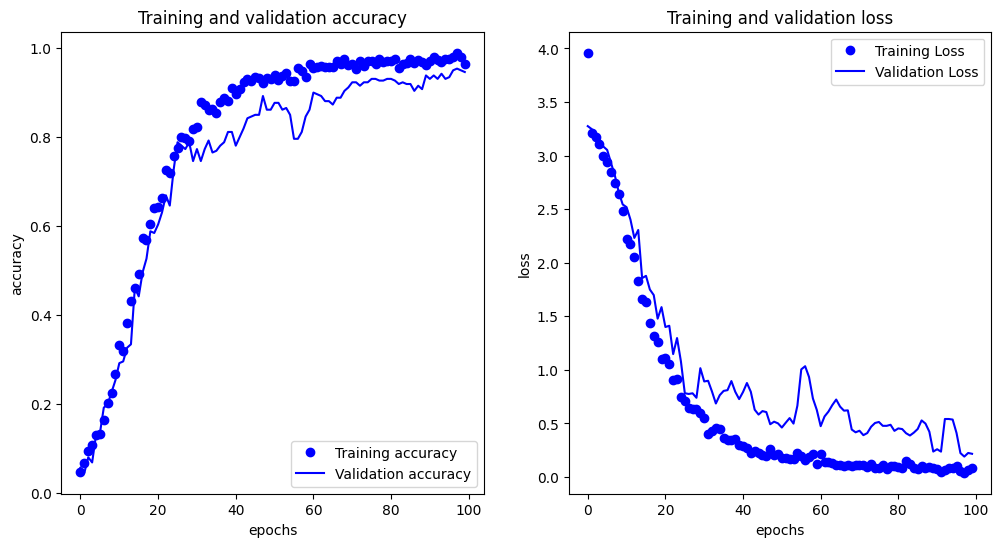

In [ ]:
import matplotlib.pyplot as plt
plot_loss_acc(history)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Muat model yang sudah dilatih
model = tf.keras.models.load_model('model_checkpoint.keras')

# Fungsi untuk memproses gambar dan melakukan prediksi
def predict_image(img_path):
  # Memuat gambar
  img = load_img(img_path, target_size=(224, 224))  # Sesuaikan ukuran jika perlu
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x /= 255.0

  # Melakukan prediksi
  prediction = model.predict(x)
  class_index = np.argmax(prediction)

  # Asumsikan Anda memiliki list label kelas
  class_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']  # Ganti dengan label kelas Anda

  # Mengembalikan prediksi
  return class_labels[class_index]

# Contoh penggunaan
uploaded_image_path = '/content/ujicoba/GambarA.jpg'  # Ganti dengan path gambar Anda
predicted_class = predict_image(uploaded_image_path)

print("Prediksi: ", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediksi:  C
